# Perceptron simple

In [216]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Dataset
Génération de données aléatoires avec une tendance linéaire avec make_blobs: on a un dataset (x, y) qui contient 100 exemples, et deux variables x1.et x2

Note: chaque fois que la cellule est executée, des données différentes sont générer donc on affecte à l'argument random_state la valeur 0 pour reproduire le meme Dataset à chaque fois.

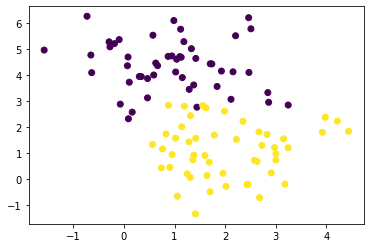

In [217]:
X, Y = make_blobs(n_samples=100, n_features=2, random_state=0, centers=2)

plt.scatter(X[:,0], X[:,1], c=Y) # afficher les résultats. X[:,0] en abscisse et X[:,1] en ordonnée

Pour effectuer un calcul matriciel correct, il est important de vérifier les dimensions de X et Y. On remarque que y n'a pas les dimensions (100, 1). On corrige le probleme avec np.reshape

In [218]:
print('Les dimensions de X : ',X.shape)
print('Les dimensions de Y : ',Y.shape)

# redimensionner y
Y = Y.reshape(Y.shape[0], 1)

print('Les nouvelles dimensions de Y : ',Y.shape)

Les dimensions de X :  (100, 2)
Les dimensions de Y :  (100,)
Les nouvelles dimensions de Y :  (100, 1)


#### Division de X et Y en sous ensemble train et test

In [219]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)

(80, 2)
(20, 2)


# 2. Fonctions du modèle
### - Initialisation des parametres W et b de notre modèle

In [220]:
def initialisation(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1,1)
    return (W,b)

In [221]:
# Test de la fonction initialisation
W, b = initialisation(X)

print('Les dimensions de W : ',W.shape)
print('Les dimensions de b : ',b.shape)

Les dimensions de W :  (2, 1)
Les dimensions de b :  (1, 1)


### - Modele
On implémente la fonction qui represente notre modele celle dans laquelle on va retrouver la fonction lineaire $Z = X.W + b$ puis notre fonction d'activation sigmoïde (ou fonction logistique) $ A = \frac{1}{1 + e^{-Z}}  $ 

Ensuite on teste le modele pour voir s'il n'y a pas d'erreur. 

In [222]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [223]:
# Test de la fonction model
A = model(X_train, W, b)

print('Les dimensions de A : ',A.shape)

Les dimensions de A :  (80, 1)


### - La fonction cout
On mesure la performance de notre modele càd les erreurs du modele sur le Dataset X,Y

$ L = \frac{-1}{m} \sum (Y.\log(A) +(1-Y).\log(1-A)) $

Ensuite, on teste notre fonction, pour voir s'il n'y a pas d'erreurs

In [224]:
def log_loss(A, Y):
    m = Y.shape[0]
    return (-1/m) * np.sum((Y * np.log(A)) + ((1 - Y) * np.log(1 - A)))


In [225]:
# Test de la fonction log_loss

log_loss(A,Y_train)

0.9744218183795867

### - Gradients et Descente de Gradient
On Calcul le gradient de la fonction cout grace aux formules suivantes : 

$\frac{\partial L }{\partial W} = \frac{1}{m} X^T.(A - Y)$

$\frac{\partial L }{\partial b} = \frac{1}{m} \sum (A - Y)$

Puis nous utiliserons ces gradients dans la fonction descente de gradient qui permettra de mettre à jour les parametres W et b
pour minimiser les erreurs

$W = W - \alpha \frac{\partial L }{\partial W}$

$b = b - \alpha \frac{\partial L }{\partial b}$

In [226]:
def gradients(A, X, Y):
    m = Y.shape[0]
    dW = (1/m) * np.dot(X.T, A - Y)
    db = (1/m) * np.sum(A - Y)
    return (dW, db)

In [227]:
#Test de la fonction gradients
dW, db = gradients(A, X_train, Y_train)

print('Les dimensions de dW : ',dW.shape)
print('La dérivée du biais : ',db)

Les dimensions de dW :  (2, 1)
La dérivée du biais :  -0.40541383832391364


In [228]:
def gradient_descent(W, b, dW, db, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [229]:
#Test de la fonction gradient_descent

print('Les valeurs initiales de W et b  : ')
print('w1 : ',W[0],'  ,  w2 : ',W[1],'  ,  b : ',b)

print('\nLes nouvelles valeurs de W et b : ')
learning_rate = 0.1
W, b = gradient_descent(W, b, dW, db, learning_rate)
print('w1 : ',W[0],'  ,  w2 : ',W[1],'  ,  b : ',b)

Les valeurs initiales de W et b  : 
w1 :  [0.11762725]   ,  w2 :  [-1.20498289]   ,  b :  [[-0.46244641]]

Les nouvelles valeurs de W et b : 
w1 :  [0.20267428]   ,  w2 :  [-1.15276239]   ,  b :  [[-0.42190503]]


In [230]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

## 3. Phase d'entrainement
Une fois les fonctions de base sont implémentées et testées , il suffit de les utiliser pour créer notre vrai neurone artificiel 

In [231]:
def artificial_neuron(X, Y, learning_rate=0.01, n_iterations=100):   
    W, b = initialisation(X)
    
    loss_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0,n_iterations):
        A = model(X, W, b)
        loss_history[i] = log_loss(A, Y) # on enregistre la valeur du Cout au tour i dans loss_history[i]
        dW, db = gradients(A, X, Y)
        W, b = gradient_descent(W, b, dW, db, learning_rate) # mise a jour des parametres W et b (formule du gradient descent)
    return W, b, loss_history

In [237]:
# Test de la fonction artifiartificial_neuron
n_iterations = 600
learning_rate = 0.01


W, b, loss_history = artificial_neuron(X_train, Y_train, learning_rate, n_iterations)

### Courbe d'apprentissage
Pour visualiser l'évaluation de la descente de gradient on peut créer un graphique qui trace la fonction cout en fonction du nombre d'itérations. Si notre descente de gradient a bien fonctionner, on doit obtenir une courbe qui diminue progressivement jusqu'à converger vers un certain minimum. Si on n'observe pas de stabilisation, alors cela signifie que le modele n'a pas terminé son apprentissage et qu'il faut soit augmenter le nombre d'itérations de la descente de gradien ou bien le pas (learning_rate)

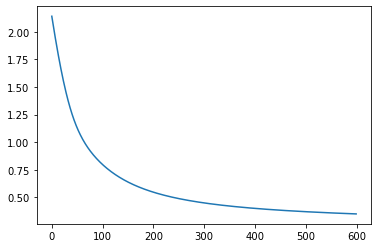

In [233]:
plt.plot(range(n_iterations),loss_history)

## 4. Phase de prédiction

In [238]:
predictions = predict(X_test, W, b)

## 5. Frontiere de décision

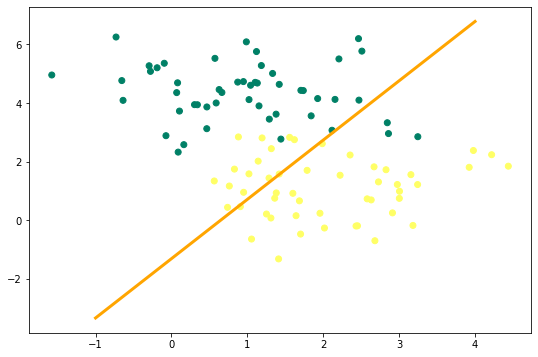

In [235]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=Y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x1 = x1.reshape(100,1)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

## 6. Evaluation du modèle

In [239]:
print(accuracy_score(Y_test, predictions))

0.95
